In [1]:
#importing the required modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA

In [3]:
#Reading the dataset
data = pd.read_csv('crime.csv')

In [5]:
#extracts the values of all crimes and crime/area
a = data.iloc[:, [1,2,3,4,5,6,7,12]].values  
a

array([[  2.        ,   6.        ,   1.        , ...,  19.        ,
          7.        , 192.5297308 ],
       [  8.        ,  28.        ,   0.        , ...,  26.        ,
         16.        , 116.7299125 ],
       [  3.        ,  28.        ,   1.        , ...,  63.        ,
         15.        , 606.5861022 ],
       ...,
       [  6.        ,  25.        ,   1.        , ...,  42.        ,
          8.        ,  91.38084635],
       [  7.        ,  15.        ,   2.        , ...,  19.        ,
          7.        , 139.572255  ],
       [  2.        ,   6.        ,   2.        , ...,  19.        ,
          8.        , 233.0267481 ]])

In [7]:
sc_a = StandardScaler() 
a = sc_a.fit_transform(a)#scales the object to fit in the required range
a

array([[-5.27237015e-01, -7.47430695e-01,  5.46264038e-02, ...,
         3.22832042e-03, -3.42881284e-01,  1.81431485e-01],
       [ 1.60742992e+00,  2.10483357e+00, -7.69735690e-01, ...,
         5.39129510e-01,  9.06544664e-01, -3.48336410e-01],
       [-1.71459192e-01,  2.10483357e+00,  5.46264038e-02, ...,
         3.37175008e+00,  7.67719559e-01,  3.07528766e+00],
       ...,
       [ 8.95874278e-01,  1.71588844e+00,  5.46264038e-02, ...,
         1.76404651e+00, -2.04056179e-01, -5.25502025e-01],
       [ 1.25165210e+00,  4.19404685e-01,  8.78988498e-01, ...,
         3.22832042e-03, -3.42881284e-01, -1.88690385e-01],
       [-5.27237015e-01, -7.47430695e-01,  8.78988498e-01, ...,
         3.22832042e-03, -2.04056179e-01,  4.64466724e-01]])

In [9]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)
wcss

[1327.9999999999998,
 996.6151424286375,
 871.9102681805609,
 772.805403744786,
 711.2396067923486,
 660.6275660059493,
 619.0829548622826,
 570.2878781509746,
 546.6994595248078,
 512.9764502206174,
 494.20567326845656,
 470.67133647403136,
 453.85732035253477,
 438.30057896030974,
 430.52139291382707,
 403.4562311134484,
 393.3724298435012,
 379.5808465826283,
 376.7791171364844,
 365.1175946122928]

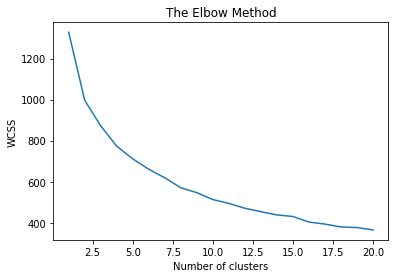

In [10]:
#Visualizing the number of clusters using Elbow method
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
k_means = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
b_kmeans = k_means.fit_predict(a)

In [15]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
a = kpca.fit_transform(a)
a

array([[ 0.10540624,  0.51001621],
       [-0.38452984, -0.27421571],
       [-0.25174138, -0.29517924],
       [ 0.15301902,  0.42036558],
       [ 0.12025227,  0.40889467],
       [-0.38180221, -0.18675696],
       [-0.0711409 ,  0.11124894],
       [-0.05654444,  0.19737937],
       [-0.0842666 ,  0.45524092],
       [-0.24653164,  0.37006164],
       [ 0.5445581 , -0.14757561],
       [-0.43393721, -0.0050741 ],
       [ 0.19149809,  0.0600477 ],
       [-0.45742903, -0.04401679],
       [ 0.59728148, -0.07084553],
       [-0.35718801, -0.01941787],
       [-0.21336237, -0.19885397],
       [-0.37007929,  0.06312392],
       [-0.22250876, -0.29513614],
       [ 0.44144108, -0.21283735],
       [-0.25720713,  0.30253597],
       [ 0.14813588, -0.09075035],
       [-0.03090801,  0.2926862 ],
       [-0.06505097,  0.38612719],
       [-0.36955749, -0.10212159],
       [-0.16587852,  0.39834553],
       [-0.23575182,  0.16421717],
       [-0.01111278,  0.32330711],
       [-0.03996317,

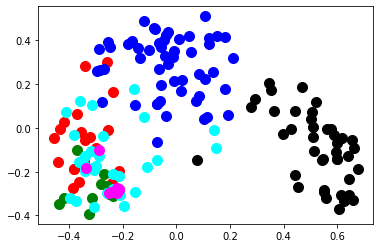

In [16]:
plt.scatter(a[b_kmeans == 0, 0], a[b_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(a[b_kmeans == 1, 0], a[b_kmeans == 1, 1], s = 100, c = 'blue')
plt.scatter(a[b_kmeans == 2, 0], a[b_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(a[b_kmeans == 3, 0], a[b_kmeans == 3, 1], s = 100, c = 'cyan')
plt.scatter(a[b_kmeans == 4, 0], a[b_kmeans == 4, 1], s = 100, c = 'magenta' )
plt.scatter(a[b_kmeans == 5, 0], a[b_kmeans == 5, 1], s = 100, c = 'black' )